In [1]:
import numpy as np
import tensorflow as tf # only these two packages required
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.reset_default_graph()

In [3]:
x = tf.placeholder(tf.float32, shape=(None))
y = tf.square(x)

In [4]:
y

<tf.Tensor 'Square:0' shape=<unknown> dtype=float32>

In [5]:
sess = tf.InteractiveSession()

In [6]:
y.eval(feed_dict={x: [1, 2, 3, 4, 5]})

array([  1.,   4.,   9.,  16.,  25.], dtype=float32)

In [7]:
# define the gradients of y with respect to x
dy_dx = tf.squeeze(tf.stack(tf.gradients(y, x)))

In [8]:
dy_dx

<tf.Tensor 'Squeeze:0' shape=<unknown> dtype=float32>

In [9]:
dy_dx.eval(feed_dict={x: 4})

8.0

In [10]:
dy_dx.eval(feed_dict={x: [1, 2, 3, 4, 5]})

array([  2.,   4.,   6.,   8.,  10.], dtype=float32)

In [11]:
g = 9.8; mu = 0.5

In [12]:
acceleration = (g * (dy_dx + (-tf.sign(dy_dx) * mu))) / tf.sqrt(1 + tf.square(dy_dx))

In [13]:
acceleration.eval(feed_dict={x: 100})

9.7753782

# Define the simulation for these values

In [14]:
start_position = 300

# In this update definition, the dt (i.e. small time interval) has been defined to remain at a default value of 1 sec. 

In [15]:
position = start_position; velocity = 0 # initial velocity is 0
x_values, y_values = [position], []

for _ in range(600):
    print "X = " + str(position) + " V = " + str(velocity)
    y_value, a = sess.run((y, acceleration), feed_dict={x: position})
    print "obtained_acceleration = " + str(a) + "\n"
    
    # now update the velocity and the position
    velocity = velocity + a
    position = position - (velocity + (a / 2))
    
    x_values.append(position); y_values.append(y_value)

X = 300 V = 0
obtained_acceleration = 9.79182

X = 285.312270641 V = 9.79181957245
obtained_acceleration = 9.7914

X = 260.833355427 V = 19.5832166672
obtained_acceleration = 9.79059

X = 226.564256191 V = 29.3738050461
obtained_acceleration = 9.78916

X = 182.506707191 V = 39.1629676819
obtained_acceleration = 9.78654

X = 128.663930893 V = 48.9495067596
obtained_acceleration = 9.78088

X = 65.0430970192 V = 58.7303915024
obtained_acceleration = 9.76204

X = -8.3303604126 V = 68.4924354553
obtained_acceleration = -9.48882

X = -62.589568615 V = 59.0036172867
obtained_acceleration = -9.76055

X = -106.952367306 V = 49.2430715561
obtained_acceleration = -9.77699

X = -141.529959679 V = 39.466085434
obtained_acceleration = -9.78263

X = -166.322103024 V = 29.6834573746
obtained_acceleration = -9.78523

X = -181.327721596 V = 19.8982315063
obtained_acceleration = -9.78645

X = -186.546276093 V = 10.1117801666
obtained_acceleration = -9.78683

X = -181.977808475 V = 0.324948310852
obtained

obtained_acceleration = -9.20134

X = 9.44846725464 V = -9.36436843872
obtained_acceleration = 9.52737

X = 4.52178430557 V = 0.162999153137
obtained_acceleration = 9.20209

X = -9.44435453415 V = 9.36509227753
obtained_acceleration = -9.52724

X = -4.51857995987 V = -0.162152290344
obtained_acceleration = -9.20163

X = 9.44601964951 V = -9.36378383636
obtained_acceleration = 9.52729

X = 4.51886224747 V = 0.163510322571
obtained_acceleration = 9.20167

X = -9.44715547562 V = 9.36518192291
obtained_acceleration = -9.52733

X = -4.52134609222 V = -0.162145614624
obtained_acceleration = -9.20203

X = 9.44384336472 V = -9.36417484283
obtained_acceleration = 9.52723

X = 4.51717567444 V = 0.163053512573
obtained_acceleration = 9.20143

X = -9.44802188873 V = 9.36448287964
obtained_acceleration = -9.52736

X = -4.52147197723 V = -0.162872314453
obtained_acceleration = -9.20205

X = 9.44447278976 V = -9.36492061615
obtained_acceleration = 9.52725

X = 4.51852083206 V = 0.162327766418
obtaine

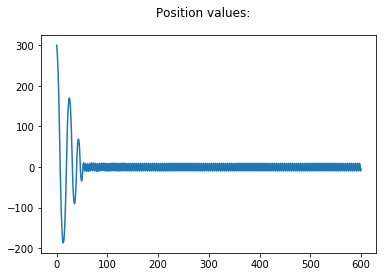

In [16]:
plt.figure().suptitle("Position values:")
plt.plot(x_values);

In [17]:
position

-4.5195035934448242

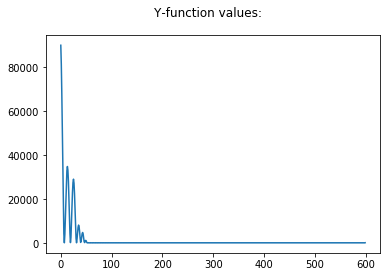

In [18]:
plt.figure().suptitle("Y-function values:")
plt.plot(y_values);

# As you can see, due to the constant dt definition, the algorithm comes to a state where it keeps oscillating between a small but fixed set of values.
-------------------------------------------------------------------------------------------------------------------
# This is somewhat a desired behaivour, however, the final oscillation range must be as small as possible.
-------------------------------------------------------------------------------------------------------------------
# I need to work out a possible solution for this problem. I am considering two possible solutions:
<ol> 
    <li> <h3> Setting a defalut value of, say epsilon, as a window of allowed final oscillation. </h3> </li>
    <li> <h3> Defining the dt as a function of slope. This is a bit hacky since we are messing with the time dimension here. It makes us feel like some higher dimensional beings though! And, it is cool. </h3> </li>
</ol>

# I find the 2nd solution more appealing, so will work on that first.

# Make dt => directly proportional to dy_dx and apply an upper limit on it. 
-------------------------------------------------------------------------------------------------------------------
I am making the upper limit to be 1. i.e the dt will never exceed 1. By doing this I think, the time will become slower as it reaches the portion of less slope

In [19]:
position = start_position; velocity = 0 # initial velocity is 0
x_values, y_values = [position], []

for _ in range(600):
    print "X = " + str(position) + " V = " + str(velocity)
    slope, y_value, a = sess.run((dy_dx, y, acceleration), feed_dict={x: position})
    print "obtained_acceleration = " + str(a)
    
    # define dt (interval of time as a function of the slope:)
    dt = min(abs(slope), 1)
    if(dt != 1):
        print "Current dt = " + str(dt) + " Current slope = " + str(slope) + "\n"
    
    # now update the velocity and the position
    velocity = velocity + (a * dt)
    position = position - ((velocity * dt) + ((a / 2) * (dt ** 2)))
    
    x_values.append(position); y_values.append(y_value)

X = 300 V = 0
obtained_acceleration = 9.79182
X = 285.312270641 V = 9.79181957245
obtained_acceleration = 9.7914
X = 260.833355427 V = 19.5832166672
obtained_acceleration = 9.79059
X = 226.564256191 V = 29.3738050461
obtained_acceleration = 9.78916
X = 182.506707191 V = 39.1629676819
obtained_acceleration = 9.78654
X = 128.663930893 V = 48.9495067596
obtained_acceleration = 9.78088
X = 65.0430970192 V = 58.7303915024
obtained_acceleration = 9.76204
X = -8.3303604126 V = 68.4924354553
obtained_acceleration = -9.48882
X = -62.589568615 V = 59.0036172867
obtained_acceleration = -9.76055
X = -106.952367306 V = 49.2430715561
obtained_acceleration = -9.77699
X = -141.529959679 V = 39.466085434
obtained_acceleration = -9.78263
X = -166.322103024 V = 29.6834573746
obtained_acceleration = -9.78523
X = -181.327721596 V = 19.8982315063
obtained_acceleration = -9.78645
X = -186.546276093 V = 10.1117801666
obtained_acceleration = -9.78683
X = -181.977808475 V = 0.324948310852
obtained_acceleration 

obtained_acceleration = 9.52743
X = 4.52251625061 V = 0.164192199707
obtained_acceleration = 9.2022
X = -9.44497299194 V = 9.36639022827
obtained_acceleration = -9.52726
X = -4.52046918869 V = -0.160872459412
obtained_acceleration = -9.2019
X = 9.44325828552 V = -9.36277580261
obtained_acceleration = 9.52721
X = 4.51521730423 V = 0.164435386658
obtained_acceleration = 9.20115
X = -9.45093870163 V = 9.36558246613
obtained_acceleration = -9.52744
X = -4.52535676956 V = -0.161860466003
obtained_acceleration = -9.20261
X = 9.4404129982 V = -9.36446666718
obtained_acceleration = 9.52712
X = 4.51419305801 V = 0.162657737732
obtained_acceleration = 9.201
X = -9.44996500015 V = 9.36365795135
obtained_acceleration = -9.52741
X = -4.52250289917 V = -0.16375541687
obtained_acceleration = -9.2022
X = 9.44454669952 V = -9.36595153809
obtained_acceleration = 9.52725
X = 4.51962280273 V = 0.161298751831
obtained_acceleration = 9.20178
X = -9.44434785843 V = 9.36308002472
obtained_acceleration = -9.52

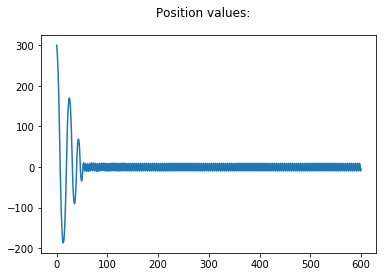

In [20]:
plt.figure().suptitle("Position values:")
plt.plot(x_values);

In [21]:
position

-4.5195035934448242

Seems like this didn't make a difference. Well it actually makes sense. I have defined the behaviour such that the time starts to get slower only after encountering a slope value of 1. Now, quite simply, the slope value of 1 will be attained only at x = 0.5. And the ball seems to oscillate in these values: 9.4 -> 4.5 -> -9.4 -> -4.5 and so on. It is never reaching x = 0.5.

-------------------------------------------------------------------------------------------------------------------
So, either I'll have to set a higher limit or remove the limit altogether. I am not really a fan of custom fitting a higher limit for this particular problem that might change in some other problem. If I do that, I'll be back to square one. The main goal of universalizing the learning rate remains as it is

## Removing the upper limit on the slope. This might make the network a bit drastic. With this, what happens is that time goes faster on steep slopes and hopefully becomes slower on gentle slopes

# dt is the absoulte value of the current slope

In [22]:
position = start_position; velocity = 0 # initial velocity is 0
x_values, y_values = [position], []

for _ in range(1000):
    print "X = " + str(position) + " V = " + str(velocity)
    slope, y_value, a = sess.run((dy_dx, y, acceleration), feed_dict={x: position})
    print "obtained_acceleration = " + str(a)
    
    # define dt (interval of time as a function of the slope:)
    dt = abs(slope)
    if(dt != 1):
        print "Current dt = " + str(dt) + " Current slope = " + str(slope) + "\n"
    
    # now update the velocity and the position
    velocity = velocity + (a * dt)
    position = position - ((velocity * dt) + ((a / 2) * (dt ** 2)))
    
    x_values.append(position); y_values.append(y_value)

X = 300 V = 0
obtained_acceleration = 9.79182
Current dt = 600.0 Current slope = 600.0

X = -5287282.60117 V = 5875.09179688
obtained_acceleration = -9.8
Current dt = 1.05746e+07 Current slope = -1.05746e+07

X = 1.64371267695e+15 V = -103624852.908
obtained_acceleration = 9.8
Current dt = 3.28743e+15 Current slope = 3.28743e+15

X = -1.58865337621e+32 V = 3.2216768627e+16
obtained_acceleration = -0.0
Current dt = 3.17731e+32 Current slope = -3.17731e+32

X = -1.02362557055e+49 V = 3.2216768627e+16
obtained_acceleration = nan
Current dt = inf Current slope = -inf

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obt

obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceler

obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceler


X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan

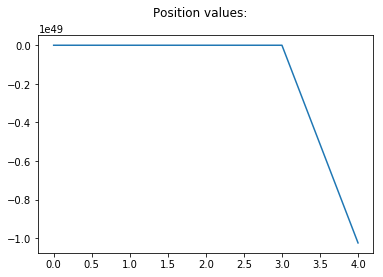

In [23]:
plt.figure().suptitle("Position values:")
plt.plot(x_values);

This behaivour was indeed a bit expected. The ball shot off to great lengths. The friction was as if not there. So, the dt cannot be directly proportional to the slope. Perhaps some slow growing function of the slope like log?

# lets try dt as log(dy_dx)

In [24]:
position = start_position; velocity = 0 # initial velocity is 0
x_values, y_values = [position], []

for _ in range(300):
    print "X = " + str(position) + " V = " + str(velocity)
    slope, y_value, a = sess.run((dy_dx, y, acceleration), feed_dict={x: position})
    print "obtained_acceleration = " + str(a)
    
    # define dt (interval of time as a function of the slope:)
    dt = np.log(abs(slope))
    if(dt != 1):
        print "Current dt = " + str(dt) + " Current slope = " + str(slope) + "\n"
    
    # now update the velocity and the position
    velocity = velocity + (a * dt)
    position = position - ((velocity * dt) + ((a / 2) * (dt ** 2)))
    
    x_values.append(position); y_values.append(y_value)

X = 300 V = 0
obtained_acceleration = 9.79182
Current dt = 6.39693 Current slope = 600.0

X = -301.032309063 V = 62.6375808716
obtained_acceleration = -9.79185
Current dt = 6.40036 Current slope = -602.065

X = -100.255924238 V = -0.033821105957
obtained_acceleration = -9.77544
Current dt = 5.30087 Current slope = -200.512

X = 311.947314076 V = -51.8521957397
obtained_acceleration = 9.79213
Current dt = 6.43598 Current slope = 623.895

X = 37.254517603 V = 11.16979599
obtained_acceleration = 9.73336
Current dt = 4.31092 Current slope = 74.509

X = -282.225193587 V = 53.1295318604
obtained_acceleration = -9.7913
Current dt = 6.33585 Current slope = -564.45

X = -29.2671514486 V = -8.90673065186
obtained_acceleration = -9.71487
Current dt = 4.06961 Current slope = -58.5343

X = 248.322675547 V = -48.4424934387
obtained_acceleration = 9.79011
Current dt = 6.20788 Current slope = 496.645

X = -16.8854537193 V = 12.3333244324
obtained_acceleration = -9.65067
Current dt = 3.5196 Current slo

obtained_acceleration = -9.78504
Current dt = 5.79476 Current slope = -328.575

X = 164.287440107 V = -28.3510093689
obtained_acceleration = 9.78504
Current dt = 5.79476 Current slope = 328.575

X = -164.287430407 V = 28.3510093689
obtained_acceleration = -9.78504
Current dt = 5.79476 Current slope = -328.575

X = 164.287377445 V = -28.3510055542
obtained_acceleration = 9.78504
Current dt = 5.79476 Current slope = 328.575

X = -164.287452512 V = 28.3510093689
obtained_acceleration = -9.78504
Current dt = 5.79476 Current slope = -328.575

X = 164.287418002 V = -28.3510093689
obtained_acceleration = 9.78504
Current dt = 5.79476 Current slope = 328.575

X = -164.287389851 V = 28.3510055542
obtained_acceleration = -9.78504
Current dt = 5.79476 Current slope = -328.575

X = 164.287440107 V = -28.3510093689
obtained_acceleration = 9.78504
Current dt = 5.79476 Current slope = 328.575

X = -164.287430407 V = 28.3510093689
obtained_acceleration = -9.78504
Current dt = 5.79476 Current slope = -3

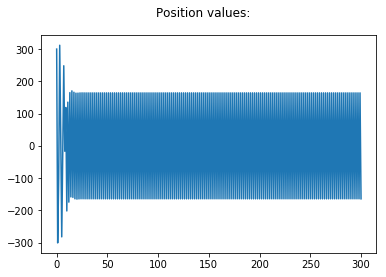

In [25]:
plt.figure().suptitle("Position values:")
plt.plot(x_values);

Damn! it stopped to some even worse equilibrium 

# Now this reminds me of a function that might exactly be what I am looking for. Could this be it? Yes I am thinking of tanh function.

We are already considering only the absolute values of slope. Thus, We will be in the positive domain of the tanh function only

In [30]:
def synthetic_function(x):
    '''
        calculates a synthetic function of the given x.
    '''
    if(x >= 0):
        y = np.tanh(np.log(np.sqrt(x + 1)))
    
    else:
        y = np.tanh(np.log(np.sqrt(-x + 1)))
        
    return y

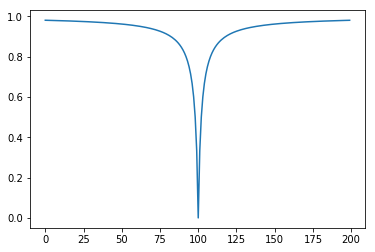

In [32]:
plot_values = [synthetic_function(val) for val in range(-100, 100)]
plt.plot(plot_values);

In [33]:
position = start_position; velocity = 0 # initial velocity is 0
x_values, y_values = [position], []

for _ in range(300):
    print "X = " + str(position) + " V = " + str(velocity)
    slope, y_value, a = sess.run((dy_dx, y, acceleration), feed_dict={x: position})
    print "obtained_acceleration = " + str(a)
    
    # define dt (interval of time as a function of the slope:)
    dt = synthetic_function(position)
    if(dt != 1):
        print "Current dt = " + str(dt) + " Current slope = " + str(slope) + "\n"
    
    # now update the velocity and the position
    velocity = velocity + (a * dt)
    position = position - ((velocity * dt) + ((a / 2) * (dt ** 2)))
    
    x_values.append(position); y_values.append(y_value)

X = 300 V = 0
obtained_acceleration = 9.79182
Current dt = 0.993377483444 Current slope = 600.0

X = 285.506165933 V = 9.72697308521
obtained_acceleration = 9.7914
Current dt = 0.993043627452 Current slope = 571.012

X = 261.363378872 V = 19.4502642033
obtained_acceleration = 9.79061
Current dt = 0.992405929752 Current slope = 522.727

X = 227.597113501 V = 29.1665220413
obtained_acceleration = 9.78921
Current dt = 0.991289089094 Current slope = 455.194

X = 184.255544753 V = 38.8704613126
obtained_acceleration = 9.78667
Current dt = 0.98926206464 Current slope = 368.511

X = 131.436044774 V = 48.5520395865
obtained_acceleration = 9.78129
Current dt = 0.985011546143 Current slope = 262.872

X = 69.3763146372 V = 58.1867222868
obtained_acceleration = 9.76443
Current dt = 0.97197950034 Current slope = 138.753

X = -1.01732155322 V = 67.677549978
obtained_acceleration = -6.63379
Current dt = 0.337160470064 Current slope = -2.03464

X = -22.7043508475 V = 65.4408993433
obtained_acceleratio


X = -0.25000397925 V = 0.000221806331552
obtained_acceleration = -7.00091e-05
Current dt = 0.111112683158 Current slope = -0.500008

X = -0.250027328245 V = 0.000214027430534
obtained_acceleration = -0.000479083
Current dt = 0.111121907324 Current slope = -0.500055

X = -0.250042237744 V = 0.000160790779968
obtained_acceleration = -0.000740298
Current dt = 0.111127797314 Current slope = -0.500084

X = -0.250046392734 V = 7.85231249025e-05
obtained_acceleration = -0.000813437
Current dt = 0.111129438727 Current slope = -0.500093

X = -0.250040050356 V = -1.18736189852e-05
obtained_acceleration = -0.000702161
Current dt = 0.111126933192 Current slope = -0.50008

X = -0.250025724197 V = -8.9902590833e-05
obtained_acceleration = -0.000450872
Current dt = 0.11112127364 Current slope = -0.500051

X = -0.250007383102 V = -0.000140004035987
obtained_acceleration = -0.000129569
Current dt = 0.111114027882 Current slope = -0.500015

X = -0.249989427142 V = -0.000154400943787
obtained_accelerati

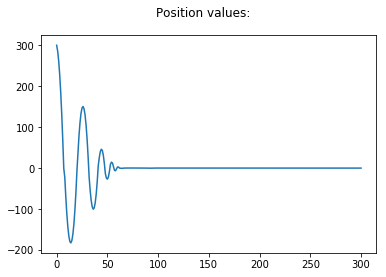

In [34]:
plt.figure().suptitle("Position values:")
plt.plot(x_values);